In [1]:
import pandas as pd
data = pd.read_csv('CarPrice_Assignment.csv')
df = data.copy()

<h1>Data Understanding

In [2]:
pd.options.display.max_columns = None         # to print all columns
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<h1>Data Cleaning

In [4]:
df.drop('car_ID', axis = 1, inplace = True)

In [5]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [6]:
df['CarName'] = df['CarName'].str.split().str[0]
print(df['CarName'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [7]:
df.loc[df['CarName'] == 'maxda', 'CarName'] = 'mazda'
df.loc[df['CarName'] == 'Nissan', 'CarName'] = 'nissan'
df.loc[df['CarName'] == 'porcshce', 'CarName'] = 'porsche'
df.loc[df['CarName'] == 'toyouta', 'CarName'] = 'toyota'
df.loc[df['CarName'] == 'vokswagen', 'CarName'] = 'volkswagen'
df.loc[df['CarName'] == 'vw', 'CarName'] = 'volkswagen'
print(df['CarName'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [8]:
df.loc[df.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


<h1>Exploratory Data Analysis

In [9]:
obj_cols = df.select_dtypes(include = 'object').columns
for col in obj_cols:
    print(col, ' : ', df[col].unique(), end = '\n\n')

CarName  :  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']

fueltype  :  ['gas' 'diesel']

aspiration  :  ['std' 'turbo']

doornumber  :  ['two' 'four']

carbody  :  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drivewheel  :  ['rwd' 'fwd' '4wd']

enginelocation  :  ['front' 'rear']

enginetype  :  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

cylindernumber  :  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

fuelsystem  :  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']



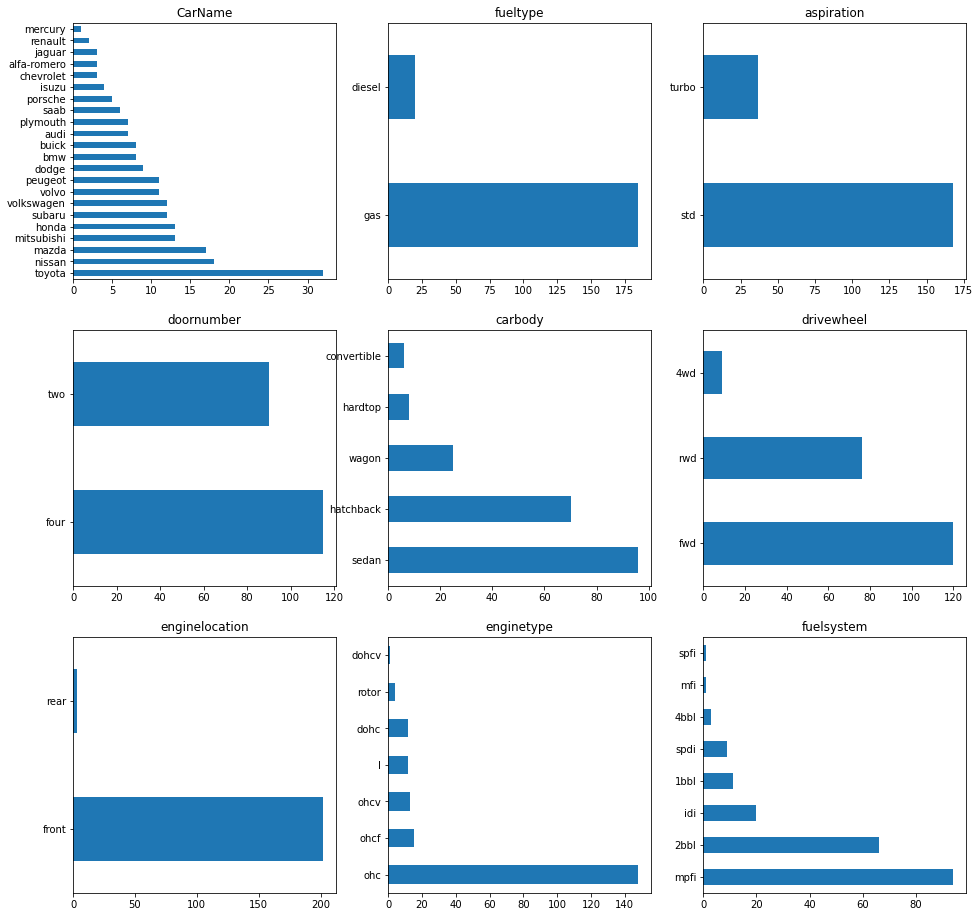

In [13]:
import matplotlib.pyplot as plt

cols = df.select_dtypes(include = 'object').columns.drop('cylindernumber')
plt.figure(figsize=(16, 16))
n = len(cols)
for i in range(1, n+1):
    plt.subplot(3, 3, i)
    plt1 = df[cols[i-1]].value_counts()
    plt1.plot(kind = 'barh')
    plt.title(cols[i-1])

In [14]:
df.drop('enginelocation', axis = 1, inplace = True)

In [16]:
print(df['fuelsystem'].value_counts())
print(df['enginetype'].value_counts())

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

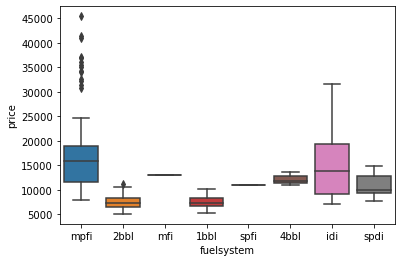

In [19]:
import seaborn as sns

sns.boxplot(data = df, y = 'price', x = 'fuelsystem')

<AxesSubplot:xlabel='enginetype', ylabel='price'>

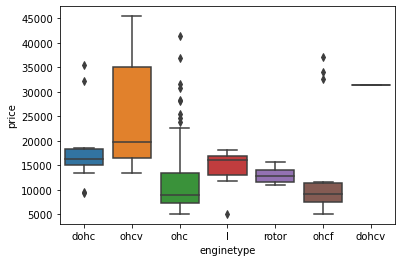

In [20]:
sns.boxplot(data = df, y = 'price', x = 'enginetype')

In [21]:
df.loc[df['fuelsystem'] == 'mfi', 'fuelsystem'] = 'idi'
df.loc[df['fuelsystem'] == 'spfi', 'fuelsystem'] = 'idi'
df.loc[df['fuelsystem'] == '4bbl', 'fuelsystem'] = 'idi'
df.loc[df['enginetype'] == 'dohcv', 'enginetype'] = 'ohcv'
df.loc[df['enginetype'] == 'rotor', 'enginetype'] = 'l'

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: CarName, dtype: int64


<AxesSubplot:xlabel='CarName', ylabel='price'>

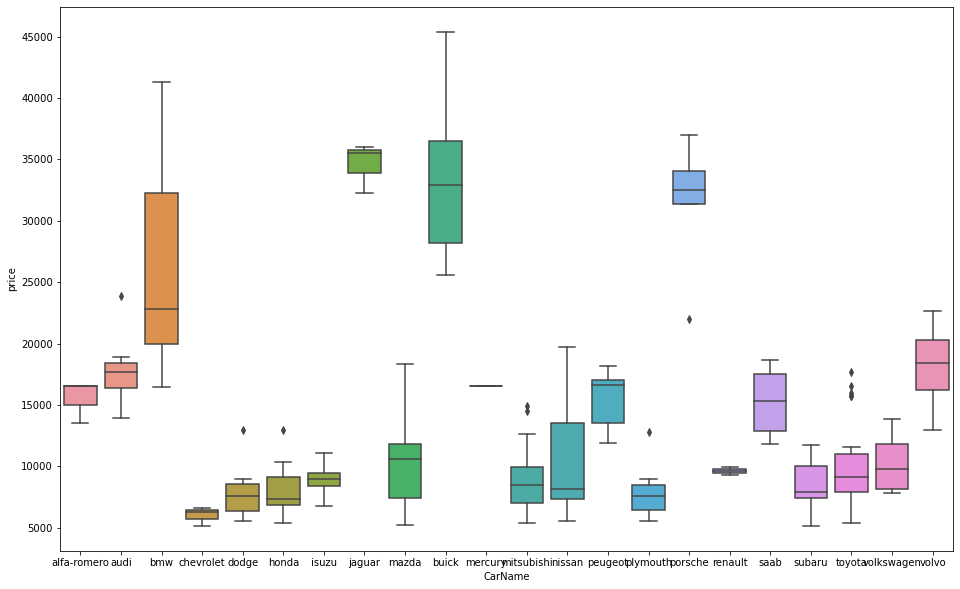

In [23]:
print(df['CarName'].value_counts())

plt.figure(figsize=(16, 10))
sns.boxplot(data = df, y = 'price', x = 'CarName')

In [24]:
df.loc[df['CarName'] == 'mercury', 'CarName'] = 'peugeot'
df.loc[df['CarName'] == 'renault', 'CarName'] = 'volkswagen'
df.loc[df['CarName'] == 'alfa-romero', 'CarName'] = 'saab'
df.loc[df['CarName'] == 'jaguar', 'CarName'] = 'buick'
df.loc[df['CarName'] == 'chevrolet', 'CarName'] = 'plymouth'

<h1>Data Preprocessing

In [25]:
from sklearn.model_selection import train_test_split 
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

In [26]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [27]:
class CylinderNumberEncoder(BaseEstimator,TransformerMixin):
        
    def fit(self,X,Y=None):
        return self
    
    def transform(self,X):
        
        X.loc[df['cylindernumber'] == 'two', 'cylindernumber'] = 2
        X.loc[df['cylindernumber'] == 'three', 'cylindernumber'] = 3
        X.loc[df['cylindernumber'] == 'four', 'cylindernumber'] = 4
        X.loc[df['cylindernumber'] == 'five', 'cylindernumber'] = 5
        X.loc[df['cylindernumber'] == 'six', 'cylindernumber'] = 6
        X.loc[df['cylindernumber'] == 'eight', 'cylindernumber'] = 8
        X.loc[df['cylindernumber'] == 'twelve', 'cylindernumber']=12
        
        X['cylindernumber'] = X['cylindernumber'].astype(str).astype(int)
        
        return X

In [28]:
class DummyVariables(BaseEstimator,TransformerMixin):
     
    def fit(self,X,Y=None):
        return self
    
    def transform(self,X):
        
        dummy_cols = X.select_dtypes(include = 'object').columns
        X = pd.get_dummies(X, columns = dummy_cols, drop_first=True)
        
        return X

In [29]:
def number_of_outliers(df):
    
    df = df.select_dtypes(exclude = 'object')
    
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(number_of_outliers(df_train))
print(number_of_outliers(df_test))

symboling            0
wheelbase            3
carlength            0
carwidth             5
carheight            0
curbweight           0
enginesize           8
boreratio            0
stroke              19
compressionratio    27
horsepower           5
peakrpm              2
citympg              1
highwaympg           2
price               12
dtype: int64
symboling           0
wheelbase           2
carlength           3
carwidth            4
carheight           0
curbweight          0
enginesize          1
boreratio           2
stroke              5
compressionratio    2
horsepower          1
peakrpm             0
citympg             0
highwaympg          0
price               3
dtype: int64


In [33]:
import numpy as np

def outlier_treatment(datacolumn):
        
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    
    return lower_range,upper_range
class OutlierTreatment(BaseEstimator,TransformerMixin):
        
    def fit(self,X,Y=None):
        return self
    
    def transform(self,X):
        
        for col in X.columns:
            lowerbound,upperbound = outlier_treatment(X[col])
            X[col]=np.clip(X[col],a_min=lowerbound,a_max=upperbound)
        return X

In [31]:
from sklearn.preprocessing import MinMaxScaler
class CustomizedScaler(BaseEstimator,TransformerMixin):
      
    def fit(self,X,Y=None):
        return self
    
    def transform(self,X):
        
        names = X.columns
        scaler = MinMaxScaler()
        scaler.fit(X)
        X =scaler.transform(X)
        X = pd.DataFrame(X, columns = names)
        
        return X

In [34]:
pipeline = Pipeline( steps = [
    
    ('cylinder_number_encoder', CylinderNumberEncoder()),
    ('encoder', DummyVariables()),
    ('outlier', OutlierTreatment()),
    ('scaler', CustomizedScaler())
])

df_train = pipeline.fit_transform(df_train)
df_test = pipeline.fit_transform(df_test)

<ipython-input-27-5adb1c62a719>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cylindernumber'] = X['cylindernumber'].astype(str).astype(int)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-27-5adb1c62a719>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

<h1>Modellin and Evaluation

In [35]:
X_train = df_train.drop('price', axis = 1)
y_train = df_train.price
X_test = df_test.drop('price', axis = 1)
y_test = df_test.price
X_train = X_train[X_test.columns]

In [37]:
import statsmodels.api as sm 

cols = list(X_train.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['symboling', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'carbody_hatchback', 'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'fuelsystem_idi', 'fuelsystem_spdi']


In [38]:
X_train = X_train[selected_features_BE]

In [39]:
X_train = sm.add_constant(X_train) #Adding the constant
lm = sm.OLS(y_train, X_train).fit() # fitting the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     99.73
Date:                Thu, 03 Mar 2022   Prob (F-statistic):           2.32e-65
Time:                        14:29:51   Log-Likelihood:                 158.24
No. Observations:                 164   AIC:                            -290.5
Df Residuals:                     151   BIC:                            -250.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1526      0.05

C:\Users\user\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [40]:
X_test = X_test[selected_features_BE]
X_test = sm.add_constant(X_test)
y_pred = lm.predict(X_test)
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7828025643949679